In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline


#IMPORTED ALL THE NECESSARY LIBRARIES

In [2]:
#LET READ OUR DATA

df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [3]:
#FIRST LET RENAME THE TABLE

df.rename(columns={'Turnover (Lacs)':'TurnOver_Lacs'})

,Date,Open,High,Low,Last,Close,Total Trade Quantity,TurnOver_Lacs
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [4]:
#LET GET THE ATE FORMAT RIGHT

df['Date']=pd.to_datetime(df['Date'])

In [5]:
#LET CONFIRM THE DATE FORMAT

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 77.3 KB


In [6]:
#LET CHECK OUR DATA DESCRIPTION

df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Open,1235.000000,168.954858,51.499145,103.000000,137.550000,151.500000,169.000000,327.700000
High,1235.000000,171.429069,52.436761,104.600000,138.925000,153.250000,172.325000,328.750000
Low,1235.000000,166.402308,50.542919,100.000000,135.250000,149.500000,166.700000,321.650000
Last,1235.000000,168.736356,51.587384,102.600000,137.175000,151.200000,169.100000,325.950000
Close,1235.000000,168.731053,51.544928,102.650000,137.225000,151.100000,169.500000,325.750000
Total Trade Quantity,1235.000000,2604151.140081,2277027.677173,100180.000000,1284481.500000,1964885.000000,3095788.500000,29191015.000000
Turnover (Lacs),1235.000000,4843.166502,5348.919832,128.040000,1801.035000,3068.510000,5852.600000,55755.080000


# EDA 

In [7]:
#LET CHECK FOR THE DISTRIBUTION OF OUR TABLE.

#FIRST LET BRING OUT THE DATA COLUMNS

df.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

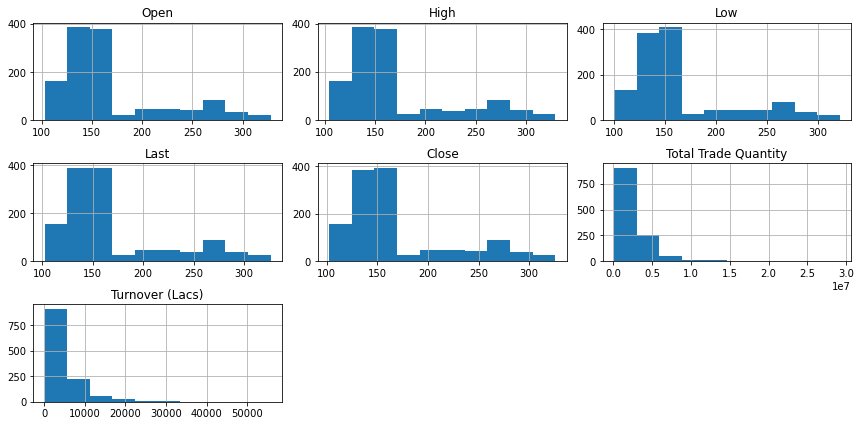

In [8]:
#NOW LET CARRYOUT THE OPERATION

list=[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)']]


for i in range(len(list)):
    plt.figure(figsize=(12,6),dpi=100)
    df[list[i]].hist(figsize=(12,6))
    plt.legend(loc='best')
    plt.tight_layout(pad=1)

In [9]:
#BEFORE PROCEDDING LET GET OUR DATE NAME AND AND DAY NAME CUZ IS GOING TO HELP IN OUR ANALYSIS.

df['Month_Name']=pd.DatetimeIndex(df['Date']).month_name()
df['Day_Name']=pd.DatetimeIndex(df['Date']).day_name()
df['Years']=pd.DatetimeIndex(df['Date']).year

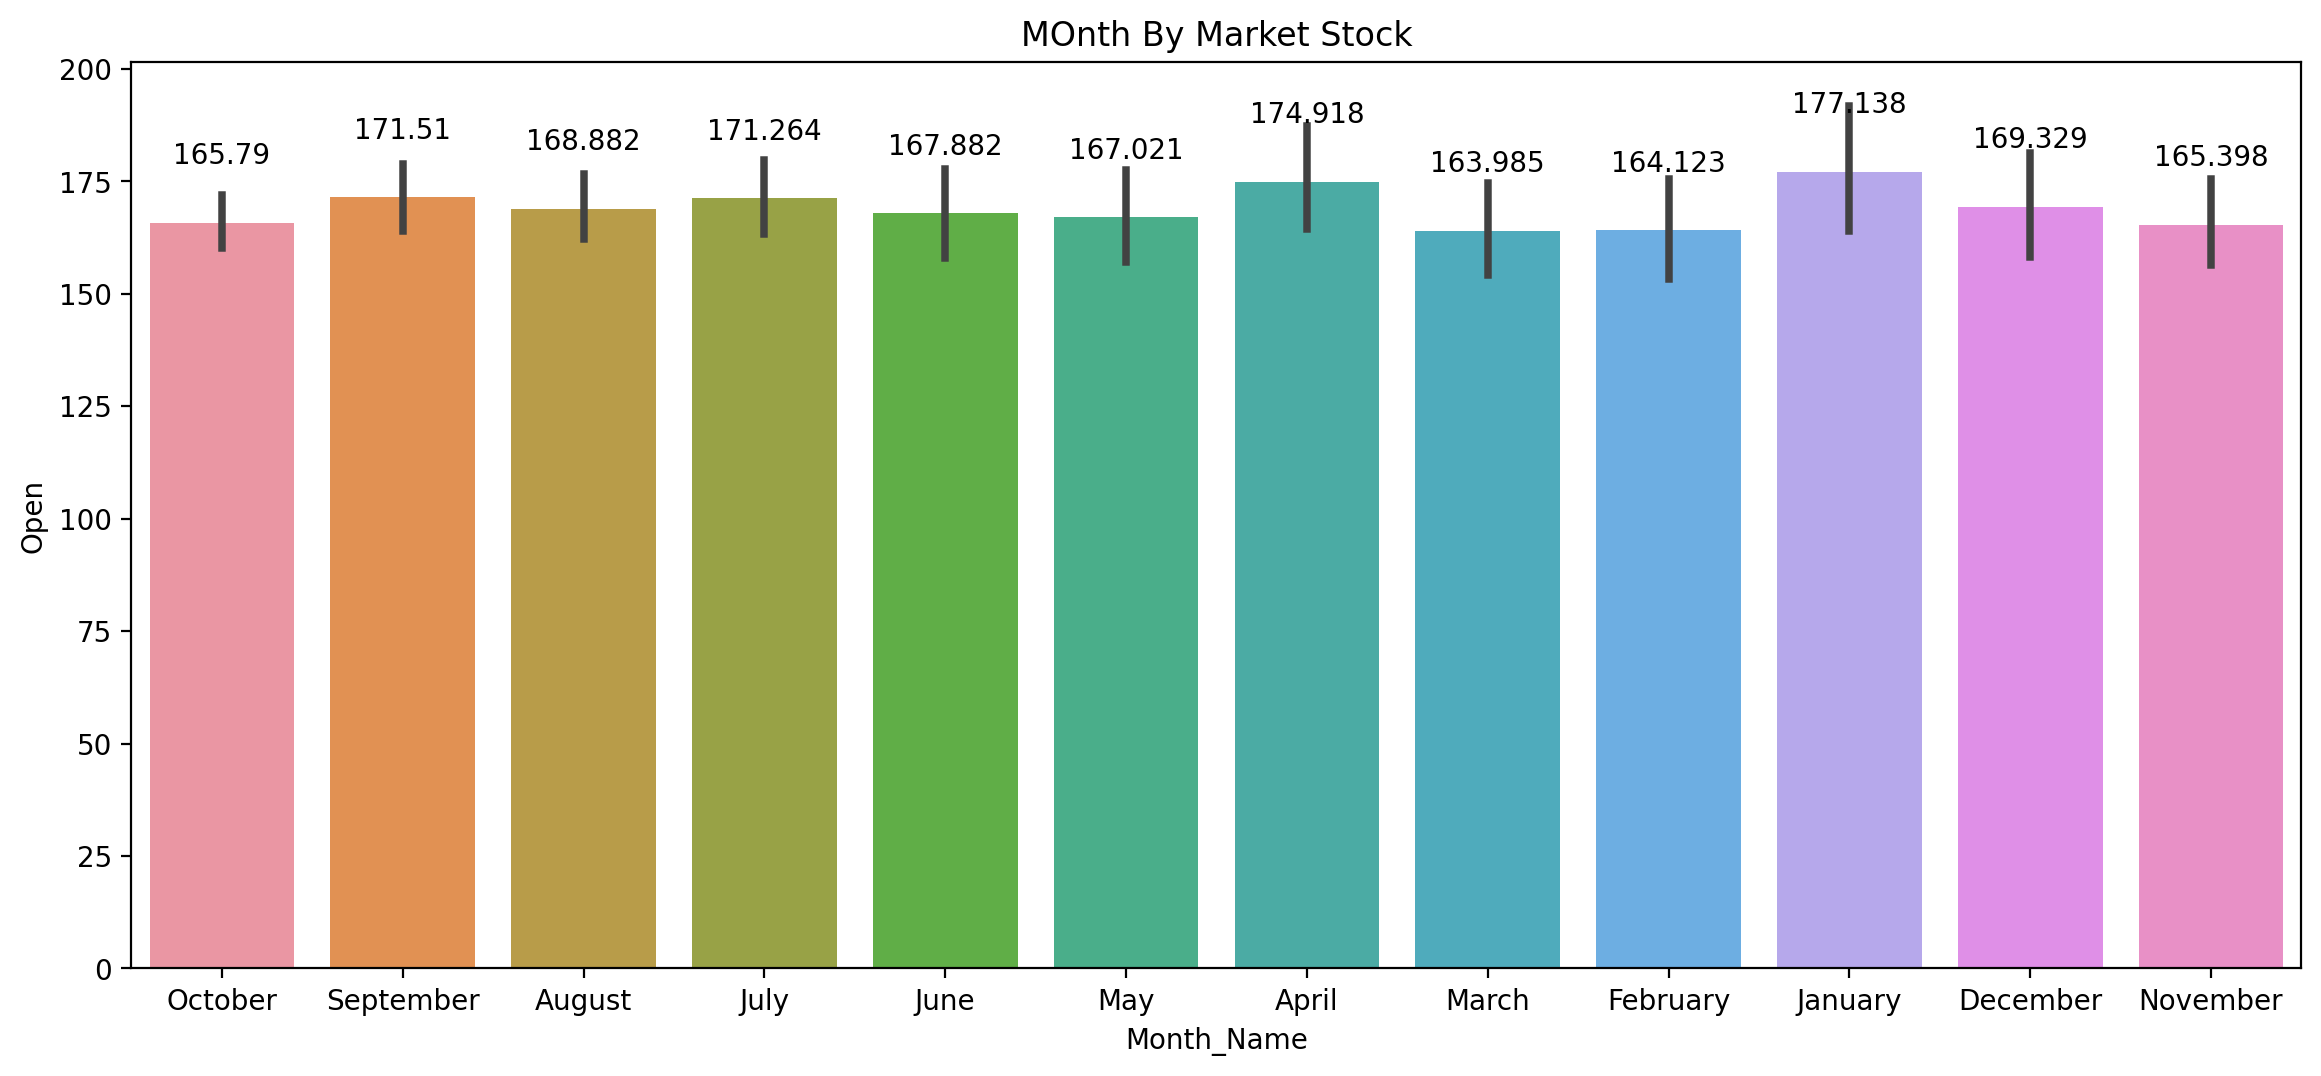

In [10]:
#HAVING DONE THAT,WE WILL BE USING THAT AS OUR ANALYSIS.
#LET CHECK OUR OPEN STOCK AND CLOSING STOCK

plt.figure(figsize=(14,6),dpi=200)
fig=sns.barplot(data=df,x='Month_Name',y='Open')
plt.title('MOnth By Market Stock')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=19)

In [11]:
print('JANUARY SEEMS TO BE THE HIGEST MARKET OPENING STOCK')
print('while NOVEMBER IS THE LOWEST OPENING STOCK')

JANUARY SEEMS TO BE THE HIGEST MARKET OPENING STOCK
while NOVEMBER IS THE LOWEST OPENING STOCK


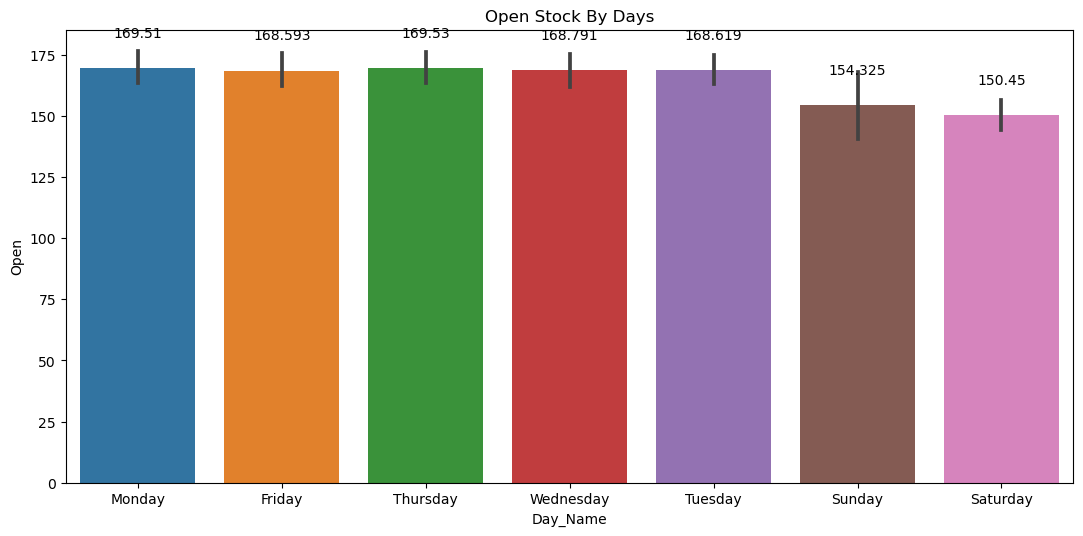

In [12]:
#LET CHECK FOR THE DAY

plt.figure(figsize=(13,6),dpi=100)
ax=sns.barplot(data=df,x='Day_Name',y='Open')
plt.title('Open Stock By Days')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=20)

In [13]:
print('Durning the Weekdays, MONDAY SEEMS TO BE THE MOST HIGH RATE OF MARKET OPENING')
print('wHHILE THE LOWEST IS SATURNDAY')

Durning the Weekdays, MONDAY SEEMS TO BE THE MOST HIGH RATE OF MARKET OPENING
wHHILE THE LOWEST IS SATURNDAY


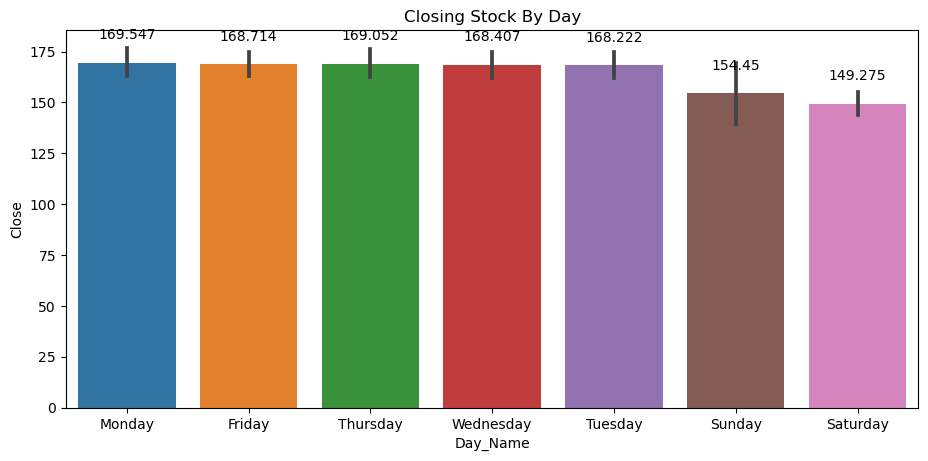

In [14]:
#CHECKING THE CLOSING STOCKING

plt.figure(figsize=(11,5),dpi=100)
ax=sns.barplot(data=df,x='Day_Name',y='Close')
plt.title('Closing Stock By Day')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=15)

In [15]:
print('Durning the Weekdays,IN CLOSING MARKET MONDAY SEEMS TO BE THE MOST HIGH RATE OF MARKET CLOSING')
print('wHHILE THE LOWEST IS SATURNDAY,CLOSE TO THE MARKET RANGE OF THE OPENING STOCK')

Durning the Weekdays,IN CLOSING MARKET MONDAY SEEMS TO BE THE MOST HIGH RATE OF MARKET CLOSING
wHHILE THE LOWEST IS SATURNDAY,CLOSE TO THE MARKET RANGE OF THE OPENING STOCK


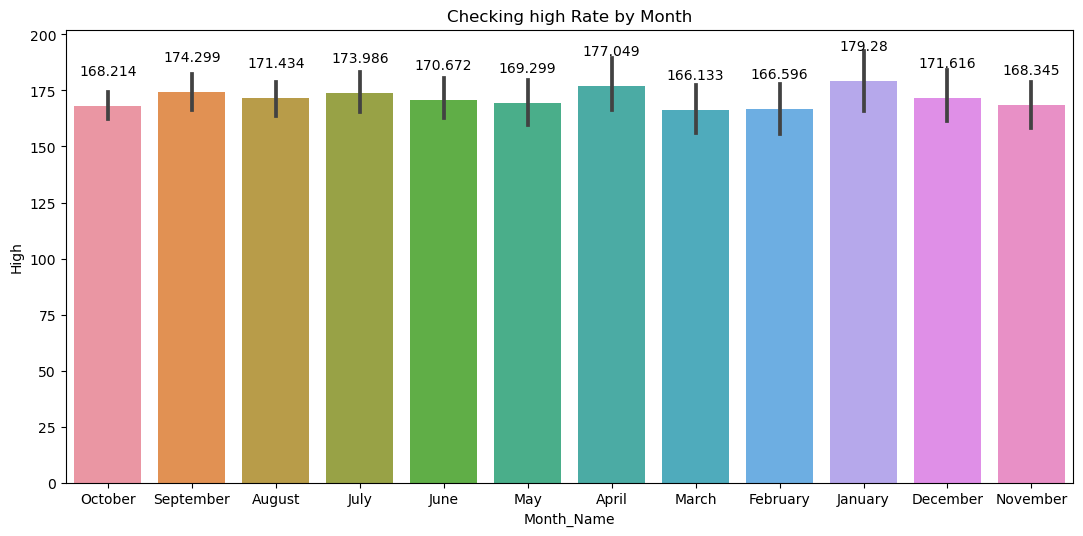

In [16]:
#checking for the High rate of our stock

plt.figure(figsize=(13,6),dpi=100)
ax=sns.barplot(data=df,x='Month_Name',y='High')
plt.title('Checking high Rate by Month')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=20)

In [17]:
print('JANUARY SEEMS TO BE THE HIGEST HIGH RATE MARKET STOCK')
print('while OCTOBER IS THE LOWEST HIGH RATE STOCK')

JANUARY SEEMS TO BE THE HIGEST HIGH RATE MARKET STOCK
while OCTOBER IS THE LOWEST HIGH RATE STOCK


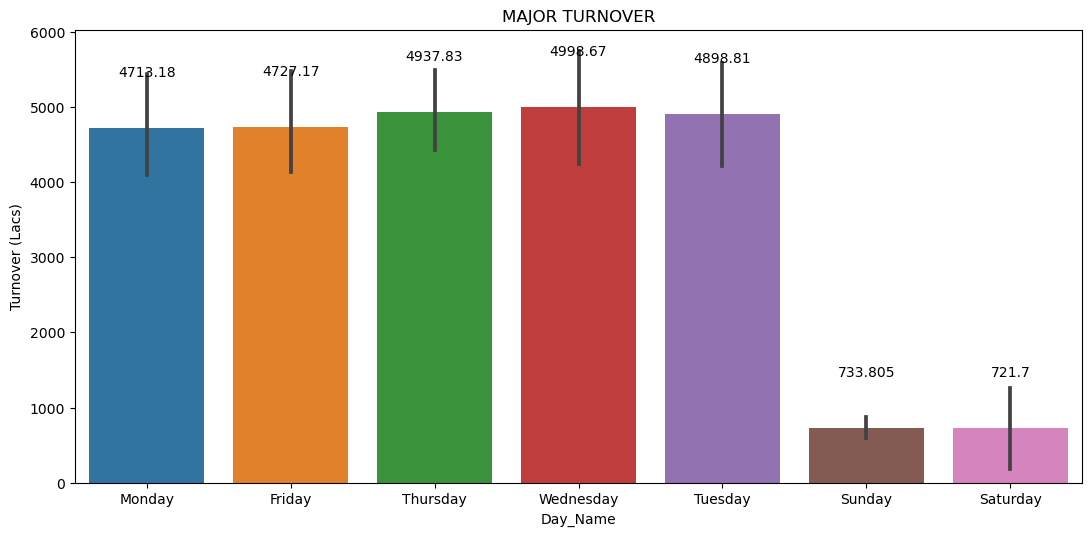

In [18]:
#CHECKING THE MAJOR TURN OVER 

plt.figure(figsize=(13,6),dpi=100)
ax=sns.barplot(data=df,x='Day_Name',y='Turnover (Lacs)')
plt.title('MAJOR TURNOVER')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=35)

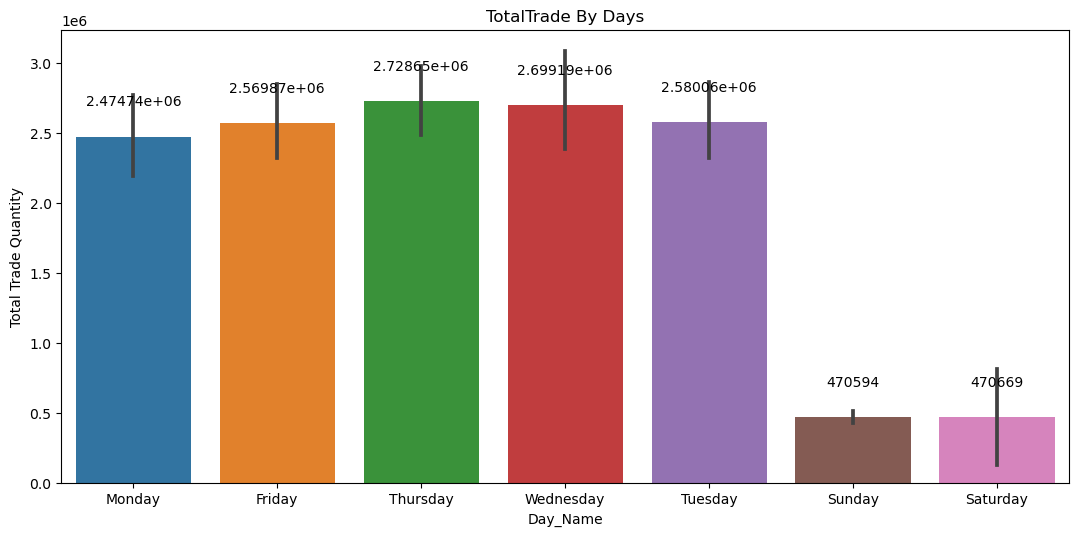

In [19]:
plt.figure(figsize=(13,6),dpi=100)
ax=sns.barplot(data=df,x='Day_Name',y='Total Trade Quantity')
plt.title('TotalTrade By Days')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=20)

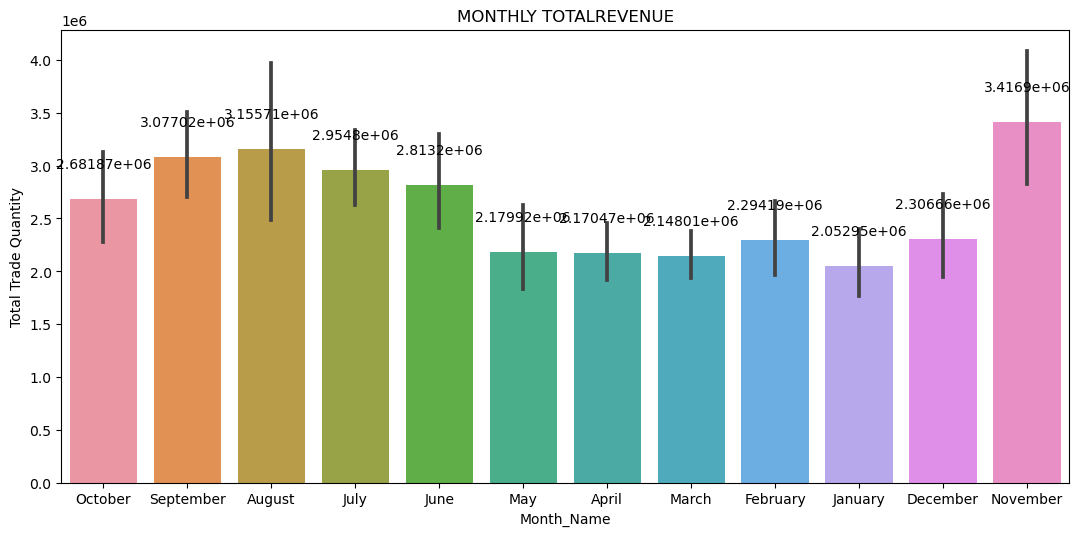

In [20]:
#CHECKING FOR THE TOTALTRADE BY MONTH

plt.figure(figsize=(13,6),dpi=100)
ax=sns.barplot(data=df,x='Month_Name',y='Total Trade Quantity')
plt.title('MONTHLY TOTALREVENUE')

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=20)

Text(0.5, 1.0, 'The Rate at which Open and Close Rate by Month')

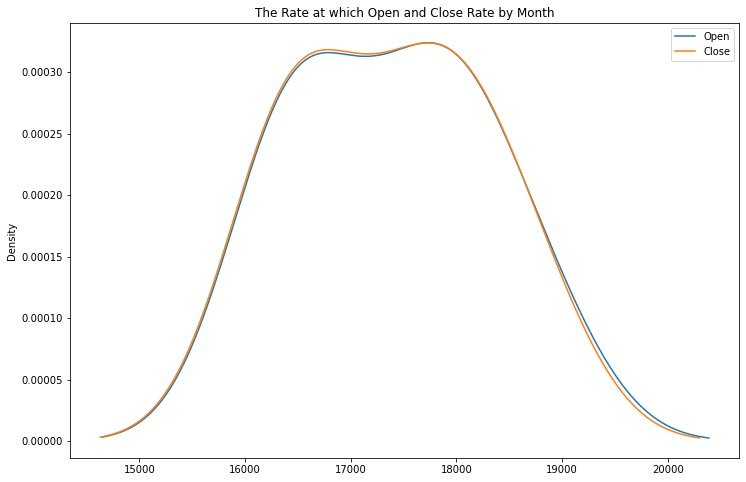

In [21]:
#LET CHECK FOR THE OPENNG AND CLOSING STOCK

df[['Open','Close','Month_Name']].groupby('Month_Name').sum().plot(kind='kde',figsize=(12,8))
plt.title('The Rate at which Open and Close Rate by Month')

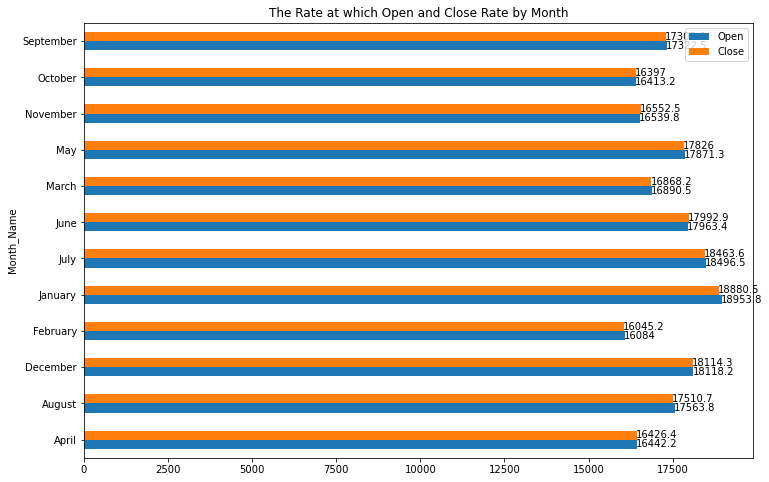

In [22]:
#we using thhis barh plot to plot out the differences between the open and close

fig=df[['Open','Close','Month_Name']].groupby('Month_Name').sum().plot(kind='barh',figsize=(12,8))
plt.title('The Rate at which Open and Close Rate by Month')
plt.legend(loc='best')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

Text(0.5, 1.0, 'The Rate at which Last and Close Rate by Month')

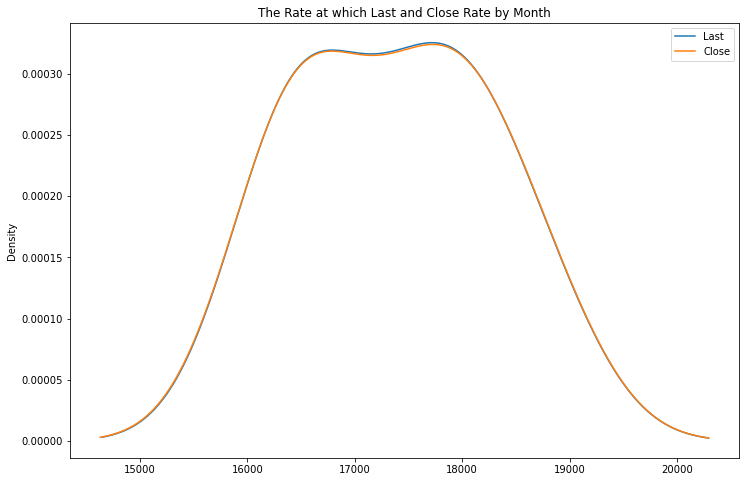

In [23]:
#LET PLOT FOR CLOSE AND LAST?


df[['Last','Close','Month_Name']].groupby('Month_Name').sum().plot(kind='kde',figsize=(12,8))
plt.title('The Rate at which Last and Close Rate by Month')

In [24]:
df.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month_Name,Day_Name,Years
0,2018-10-08,208.0,222.25,206.85,216.00,215.15,4642146.0,10062.83,October,Monday,2018
1,2018-10-05,217.0,218.60,205.90,210.25,209.20,3519515.0,7407.06,October,Friday,2018


In [25]:
#LET GET RELATIONSHIP OF OUR TABLE

df.corr().style.background_gradient(cmap='mako')

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Years
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026,0.600544
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907,0.602435
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446,0.599640
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575,0.600784
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155,0.600790
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976,0.179461
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000,0.334432
Years,0.600544,0.602435,0.599640,0.600784,0.600790,0.179461,0.334432,1.000000


In [28]:
#HAVING DONE THAT,LET PROCEED TO ASSIGNING 

X=df.drop(columns=['Date','Open','High','Low','Last','Month_Name','Day_Name',],axis=1)

y=df['Open']

In [29]:
#let importing the library

from sklearn.model_selection import train_test_split

In [30]:
#TRAINING OUR VARIABLE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
#IMPORTING STANDARDSCALER


from sklearn.preprocessing import StandardScaler

In [34]:
#CREATING INSTANCES


scaler=StandardScaler()

In [35]:
#TO AVIODING DATA LEAKAGES

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
#IMPORTING NECESSARY LIBRARIES

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [37]:
#THEN I HAVE TO INSTANCES SINCE IS NOT ONE LIBRARY AM USING 

Models={'LinearRegression':LinearRegression(),
       'Ridge':Ridge(),
       'ElasticNet':ElasticNet(),
       'Lasso':Lasso()}

In [39]:
#THE METHODOLOGY

Result={'Model':[],
       'Train':[],
       'Test':[],
       'RSME':[]}

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
#LET WORK ON IT


for name,model in Models.items():
    model.fit(X_train,np.log(y_train))
    Train=model.score(X_train,np.log(y_train))
    Test=model.score(X_test,np.log(y_test))
    test_predict=model.predict(X_test)
    RSME=mean_squared_error(np.sqrt(y_test),test_predict)
    Result['Model'].append(name)
    Result['Train'].append(Train)
    Result['Test'].append(Test)
    Result['RSME'].append(RSME)
    print('Model:',name)
    print('Train:',Train)
    print('Test:',Test)
    print('RSME:',round(RSME,2))
    print('=====================')

Model: LinearRegression
Train: 0.984026758740952
Test: 0.981056008832628
RSME: 62.64
Model: Ridge
Train: 0.9840121000541068
Test: 0.9811592964627509
RSME: 62.64
Model: ElasticNet
Train: 0.0
Test: -0.0002951184810005003
RSME: 63.41
Model: Lasso
Train: 0.0
Test: -0.0002951184810005003
RSME: 63.41


In [42]:
#SO HERE I HAVE TO HIDE THE TEST VARIABLE

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.33, random_state=101)

In [43]:
#HERE,I HAVE TO HIDE THE TRAIN DATA

X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.33, random_state=101)

In [45]:
#HERE WE GO
Scal=StandardScaler()

Scal.fit(X_train)
Scal.transform(X_train)
Scal_test=Scal.transform(X_test)

Result={'Model':[],
       'Train':[],
       'Test':[],
       'RSME':[]}

Models={'LinearRegression':LinearRegression(),
       'Ridge':Ridge(),
       'ElasticNet':ElasticNet(),
       'Lasso':Lasso()}

for name,model in Models.items():
    model.fit(X_train,np.log(y_train))
    Train=model.score(X_train,np.log(y_train))
    Test=model.score(X_test,np.log(y_test))
    test_predict=model.predict(Scal_test)
    RSME=mean_squared_error(np.sqrt(y_test),test_predict)
    Result['Model'].append(name)
    Result['Train'].append(Train)
    Result['Test'].append(Test)
    Result['RSME'].append(RSME)
    print('Model:',name)
    print('Train:',Train)
    print('Test:',Test)
    print('RSME:',round(RSME,2))
    print('=====================')

Model: LinearRegression
Train: 0.9827693678739858
Test: 0.9831474385441322
RSME: 56.58
Model: Ridge
Train: 0.9827693668659665
Test: 0.9831476223480166
RSME: 56.37
Model: ElasticNet
Train: 0.9765711210817922
Test: 0.9744486883575674
RSME: 82.24
Model: Lasso
Train: 0.962249831147802
Test: 0.9511870141572607
RSME: 80.37


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [47]:
#THEN IT TURN OUT TO THAT ELASTICNET COME OUT STRONGER, FOLLOW BY LASSO REGRESSION.


#HERE CREATE TABLE COEFFICIENT TABLE

new=pd.DataFrame(data=model.coef_,index=X.columns,columns=['Cofficienct'])

new

,Cofficienct
Close,4.083432e-03
Total Trade Quantity,-3.005245e-08
Turnover (Lacs),1.860857e-05
Years,0.000000e+00
